In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation
import random

In [8]:
G = nx.dodecahedral_graph()
pos = nx.spectral_layout(G, dim=3)
nodes = np.array([pos[v] for v in G])
edges = np.array([(pos[u], pos[v]) for u, v in G.edges()])

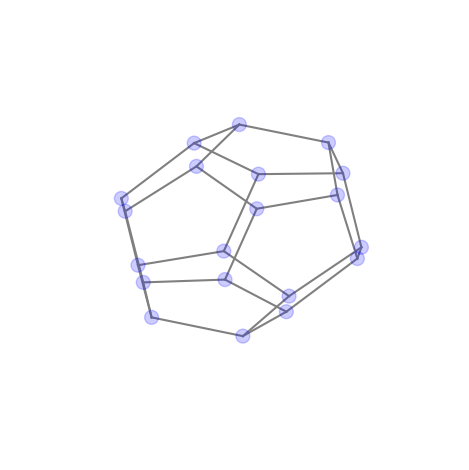

In [14]:
def init():
    ax.scatter(*nodes.T, alpha=0.2, s=100, color="blue")
    for vizedge in edges:
        ax.plot(*vizedge.T, color="gray")
    
    ax.grid(False)
    ax.set_axis_off()
    plt.tight_layout()
    return


def _frame_update(index):
    ax.view_init(index * 0.2, index * 0.5)
    return


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ani = animation.FuncAnimation(
    fig,
    _frame_update,
    init_func=init,
    interval=50,
    cache_frame_data=False,
    frames=100,
)
# plt.show()

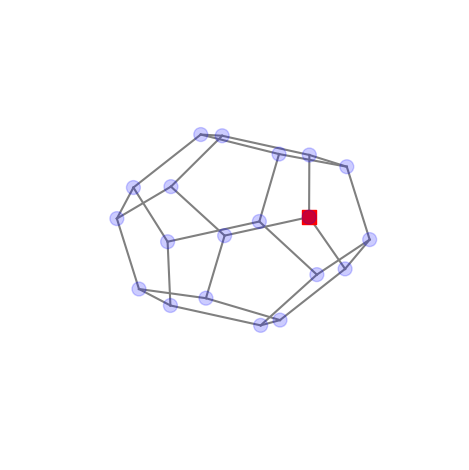

In [13]:
def _frame_update(index):
    ax.clear()
    ax.scatter(*nodes.T, alpha=0.2, s=100, color="blue")
    for vizedge in edges:
        ax.plot(*vizedge.T, color="gray")
    neighbors = list(G.neighbors(node[0]))
    if index % 5 == 0:
        node[0] = random.choice(neighbors)
    node0 = nodes[node[0]]
    ax.scatter(*node0, alpha=1, marker="s", color="red", s=100)
    ax.view_init(index * 0.2, index * 0.5)
    ax.grid(False)
    ax.set_axis_off()
    plt.tight_layout()
    return


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.grid(False)
ax.set_axis_off()
plt.tight_layout()
node = [0]
ani = animation.FuncAnimation(
    fig,
    _frame_update,
    interval=50,
    cache_frame_data=False,
    frames=100,
)
# plt.show()